# Gradient Descent from scratch with Python based on log loss function

<br>

This notebook will implement the Gradient Descent algorithm from scratch. The following implementation is based on the Log Loss function :

<br>

\begin{equation*}
Error(y,\hat{y}) = -y \log (\hat{y})-(1-y)\log(1-\hat{y})
\end{equation*}

### Imports


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load dataset

In [18]:
# header = None does not include header on dataframe, generating
# numerical "names" for all columns
dataset = np.asarray(pd.read_csv('../dataset/random_dataset4', header=None))
X = dataset[:,:-1]
y = dataset[:,-1]
# y = np.array(dataset[[2]])

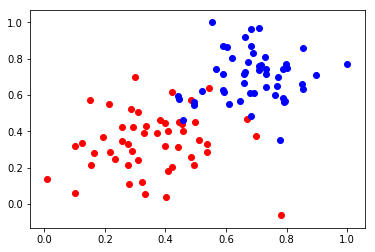

In [20]:
label_dict = {0: 'blue', 1: 'red'}
fig, ax = plt.subplots()
for i in range(0, len(X)):
    plt.scatter(X[i][0], X[i][1], color=label_dict[y[i]])
plt.show()

### Gradient Descent basic functions

For the Gradient Descent implementation, the following formulas are used 
:

<br>

- Sigmoid activation
<br>

\begin{equation*}
\sigma (x) = \frac{1}{1+e^{-x}}
\end{equation*}

<br>

- Prediction
\begin{equation*}
\hat{y} =\sigma(w_1x_1+w_2x_2+b)
\end{equation*}

<br>

- Log loss error function
\begin{equation*}
Error(y,\hat{y}) = -y \log (\hat{y})-(1-y)\log(1-\hat{y})
\end{equation*}

<br>

- Weights and bias update rules
\begin{equation*}
w_i\rightarrow w_i+\alpha(y-\hat{y})x_i
\end{equation*}
\begin{equation*}
b\rightarrow b+\alpha(y-\hat{y})
\end{equation*}


In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def log_loss_error(y, y_pred):
    return -y*np.log(y_pred) - (1 - y) * np.log(1-y_pred)

def update_weights(X, y, w, b, learning_rate):
    y_pred = predict(X, w, b)
    w += learning_rate * (y - y_pred) * X
    b += learning_rate * (y - y_pred)
    return w, b